## Lab 8: TD(0) algorithm

### Initialisation

In [1]:
import numpy as np
n_states = 5
alpha = 0.05 
gamma = 0.9  
n_episodes = 100 
reward_goal = 1  
reward_step = -0.1

V = np.zeros(n_states + 1) 
V[5] = reward_goal 

### Random Action

In [2]:
import random
def take_action(state):
    if state == 1:
        return 2  
    if state == 5:
        return 5 
    return state + random.choice([-1, 1])

### TD[0]

In [3]:
def td_zero():
    global V
    for episode in range(n_episodes):
        state = random.randint(1, 4) 
        while state != 5: 
            next_state = take_action(state)
            reward = reward_goal if next_state == 5 else reward_step

            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state  
        if episode % 10 == 0:
            print(f"Episode {episode}: {V[1:6]}") 
    return V

### Execution

Episode 0: [ 0.       -0.005225 -0.00975   0.095     1.      ]
Episode 10: [-0.14757849 -0.12223216  0.09743416  0.70757857  1.        ]
Episode 20: [-0.17693658 -0.11091385  0.26802532  1.02716641  1.        ]
Episode 30: [-0.17599712 -0.06503161  0.2750418   0.9844909   1.        ]
Episode 40: [-0.13541686  0.00679193  0.23747599  1.02593387  1.        ]
Episode 50: [-0.12130431  0.00630442  0.41712405  1.21576167  1.        ]
Episode 60: [-0.12185575 -0.01952814  0.42476406  1.09990422  1.        ]
Episode 70: [-0.11836681  0.03558752  0.50697482  1.09931587  1.        ]
Episode 80: [-0.07522872  0.08136293  0.35633892  1.10273565  1.        ]
Episode 90: [-0.06187572  0.15492165  0.54464776  1.16194555  1.        ]


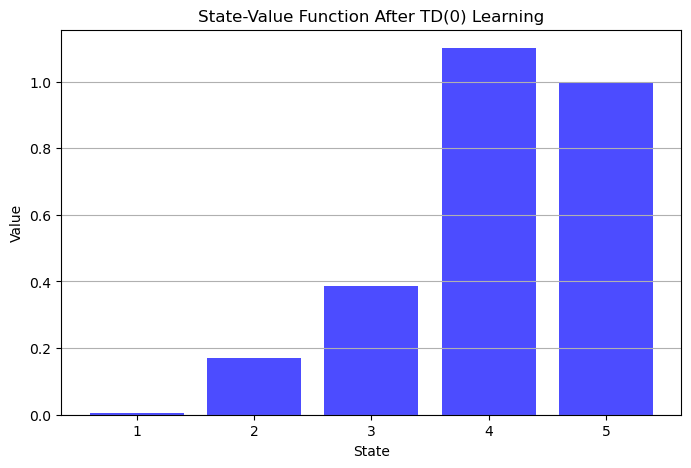

In [4]:
import matplotlib.pyplot as plt
final_values = td_zero()

plt.figure(figsize=(8, 5))
plt.bar(range(1, n_states + 1), final_values[1:6], color='blue', alpha=0.7)
plt.title("State-Value Function After TD(0) Learning")
plt.xlabel("State")
plt.ylabel("Value")
plt.xticks(range(1, n_states + 1))
plt.grid(axis='y')
plt.show()

## END